**Goal:** PCA of gene abundances in bone marrow derived macrophages (BMDMs) or an analogous cell line (J774s) at two time points after infection with either live *Mycobacterium tuberculosis* (Mtb), dead Mtb, or mock, based on kallisto estimates from the raw reads of <A href="https://www.ncbi.nlm.nih.gov/pubmed/28176867">Sci Rep 7:42225</A> (<A href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE88801">GSE88801</A>)

## Tools

In [2]:
import numpy as np

Set up plotting, including 3D plotting

In [3]:
%matplotlib nbagg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Array transforms from yesterday

In [4]:
def col_center(d):
    mean = np.mean(d, axis = 0)
    return d - mean

def col_scale(d):
    norm = np.linalg.norm(d, axis = 0)
    return d/norm

def correlation_matrix(d):
    scaled = col_scale(col_center(d))
    return np.dot(scaled.T,scaled)

## Data

Load gene by sample matrix of $\log_2(TPM)$ values

In [5]:
%cd ../data/

/home/explorer/BMS270/data


In [6]:
from csv import reader, excel_tab
orfs = []
names = []
data = []
fin = reader(open("GSE88801_kallisto_TPMs_thresh10.cdt"),dialect=excel_tab)
header = next(fin)[2:]
for row in fin:
    orfs.append(row[0])
    names.append(row[1])
    data.append([float(i) for i in row[2:]])

In [7]:
D = np.array(data)
D.shape

(9939, 36)

## Analysis

<IPython.core.display.Javascript object>


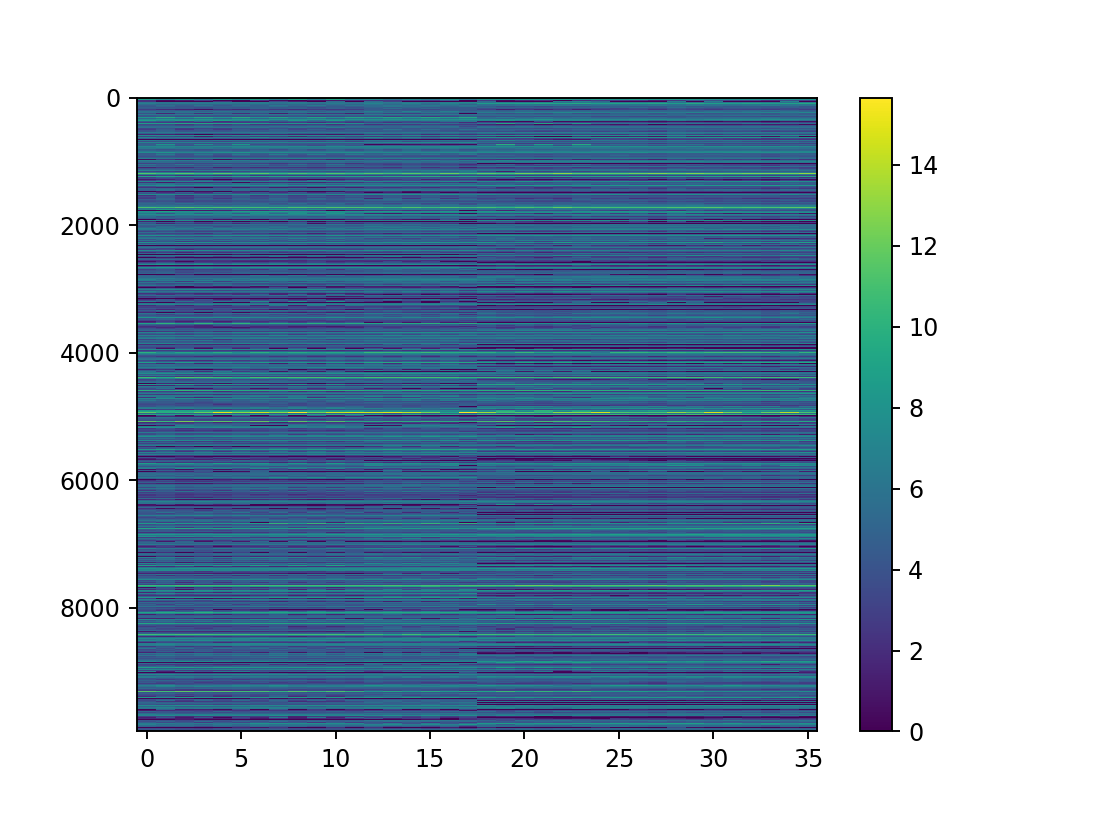

In [8]:
fig = plt.figure()
plt.imshow(D, interpolation = "none", aspect = "auto")
plt.colorbar()

In [9]:
print(header)

['BMDM_Live_1_4h', 'BMDM_Live_1_24h', 'BMDM_Live_2_4h', 'BMDM_Live_2_24h', 'BMDM_Live_3_4h', 'BMDM_Live_3_24h', 'BMDM_Dead_1_4h', 'BMDM_Dead_1_24h', 'BMDM_Dead_2_4h', 'BMDM_Dead_2_24h', 'BMDM_Dead_3_4h', 'BMDM_Dead_3_24h', 'BMDM_uninfected_1_4h', 'BMDM_uninfected_1_24h', 'BMDM_uninfected_2_4h', 'BMDM_uninfected_2_24h', 'BMDM_uninfected_3_4h', 'BMDM_uninfected_3_24h', 'J774_Live_1_4h', 'J774_Live_1_24h', 'J774_Live_2_4h', 'J774_Live_2_24h', 'J774_Live_3_4h', 'J774_Live_3_24h', 'J774_Dead_1_4h', 'J774_Dead_1_24h', 'J774_Dead_2_4h', 'J774_Dead_2_24h', 'J774_Dead_3_4h', 'J774_Dead_3_24h', 'J774_uninfected_1_4h', 'J774_uninfected_1_24h', 'J774_uninfected_2_4h', 'J774_uninfected_2_24h', 'J774_uninfected_3_4h', 'J774_uninfected_3_24h']


In [10]:
P = D[:,(0,1)].T
P.shape

(2, 9939)

<IPython.core.display.Javascript object>


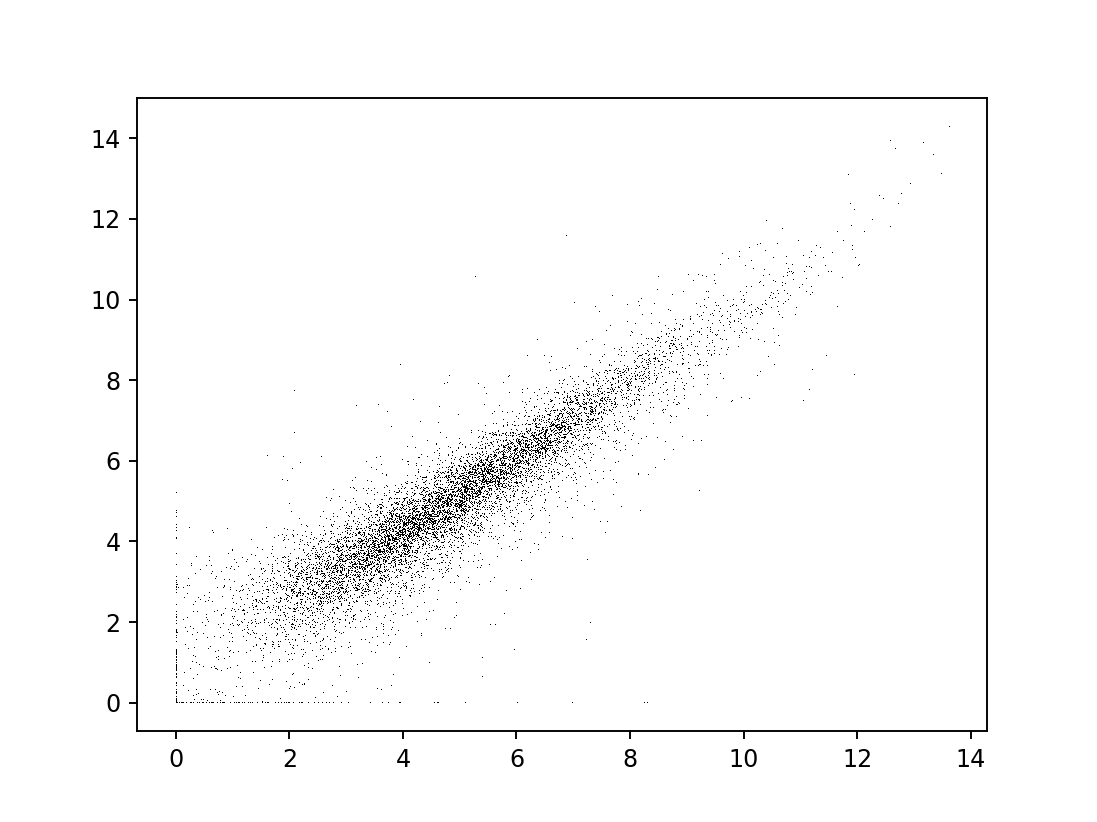

In [11]:
fig = plt.figure()
plt.plot(P[0],P[1],"k,")

Remove points exactly at the origin to avoid divide by zero

In [12]:
z = (np.linalg.norm(P, axis = 0) != 0.)
z.shape,z[0]

((9939,), True)

In [13]:
P = P[:,z]
P.shape

(2, 9759)

<IPython.core.display.Javascript object>


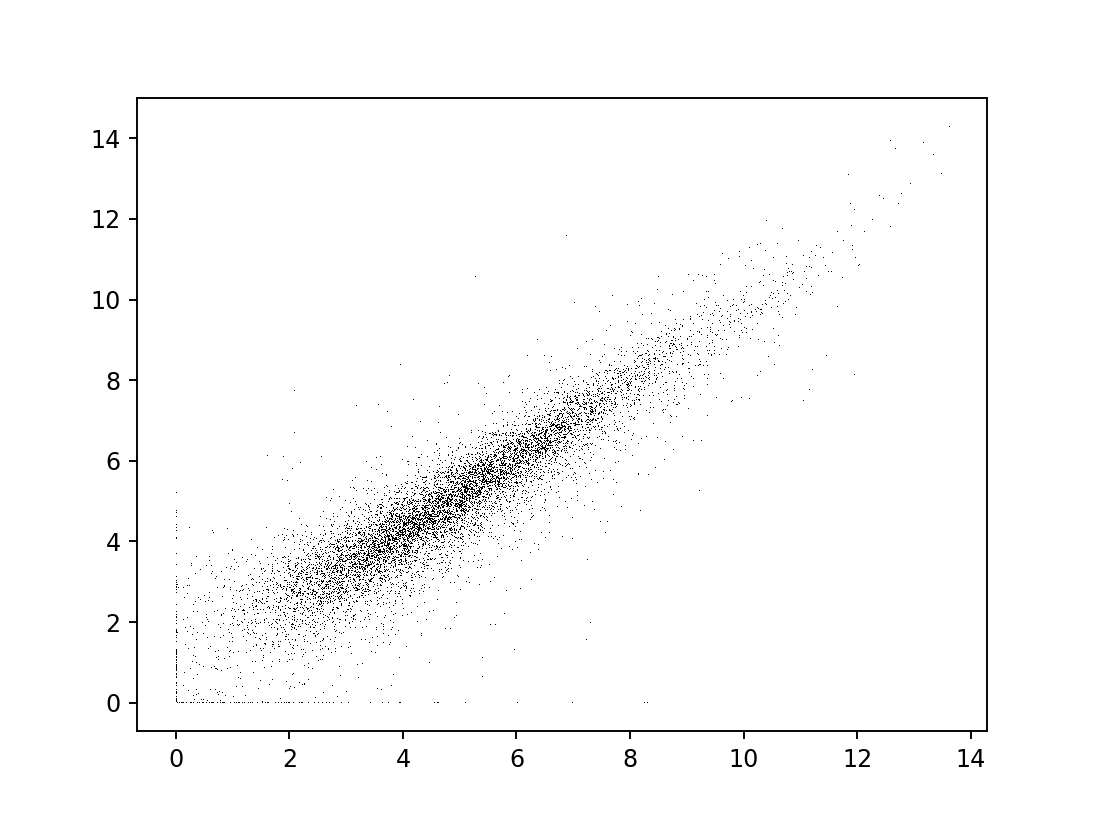

In [14]:
fig = plt.figure()
plt.plot(P[0],P[1],"k,")

In [15]:
C = correlation_matrix(P.T)
C.shape

(2, 2)

<IPython.core.display.Javascript object>


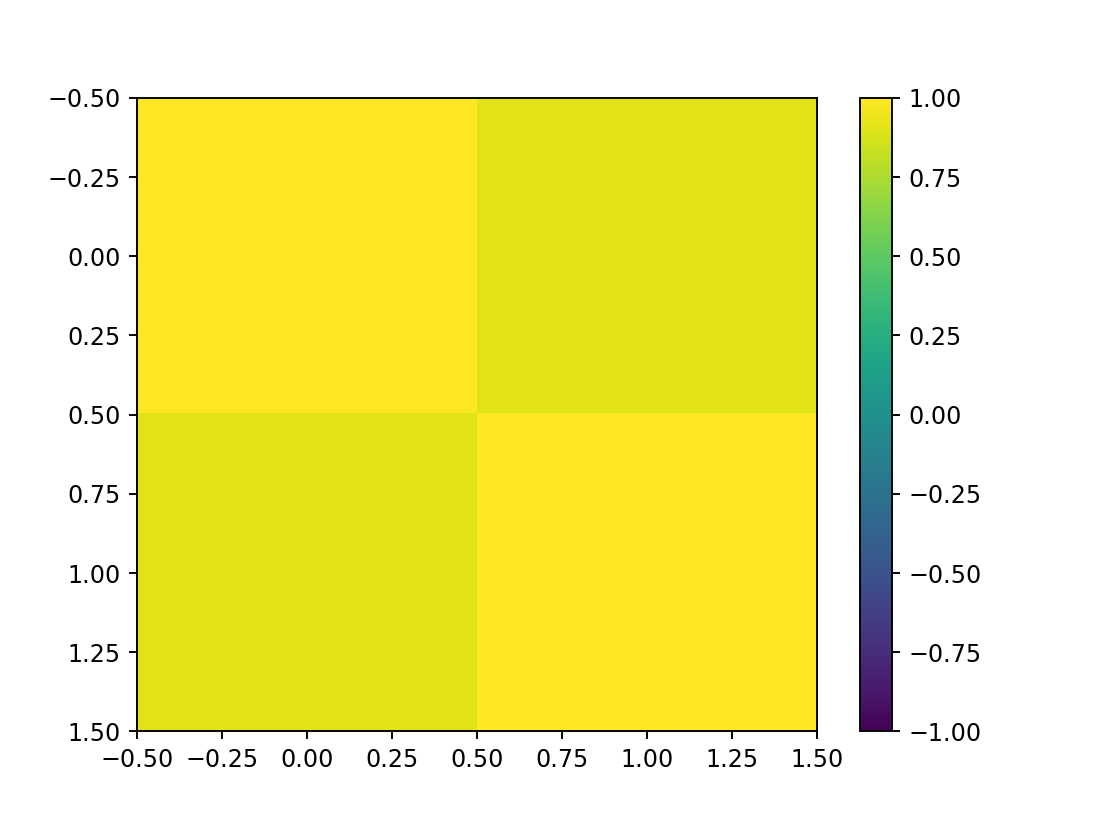

In [16]:
fig = plt.figure()
plt.imshow(C, aspect = "auto", vmin = -1, vmax = 1)
plt.colorbar()

In [31]:
s2 = 1/np.sqrt(2)
R = np.array([[s2,s2],[-s2,s2]])

In [32]:
PR = np.dot(R,P)
PR.shape

(2, 9759)

<IPython.core.display.Javascript object>


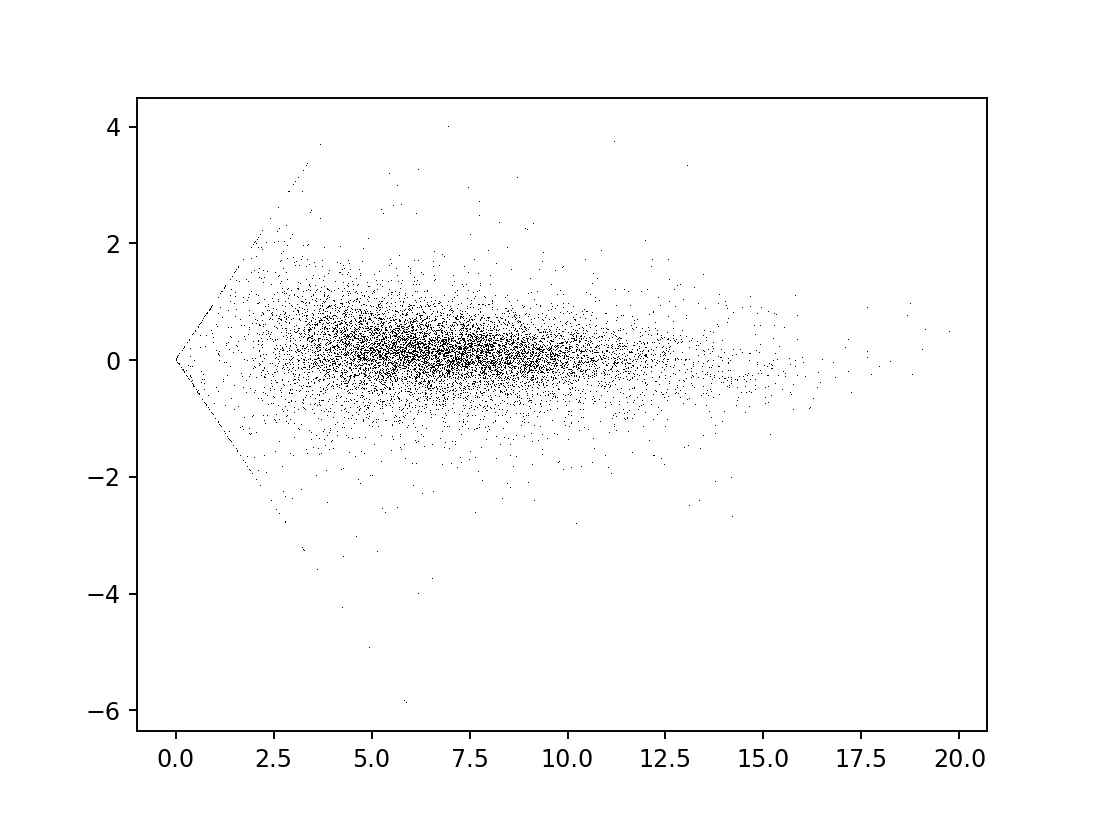

In [33]:
fig = plt.figure()
plt.plot(PR[0],PR[1],"k,")

In [34]:
a = (P[0]+P[1])/2. # average (geometric mean)
m = (P[1]-P[0]) # difference

<IPython.core.display.Javascript object>


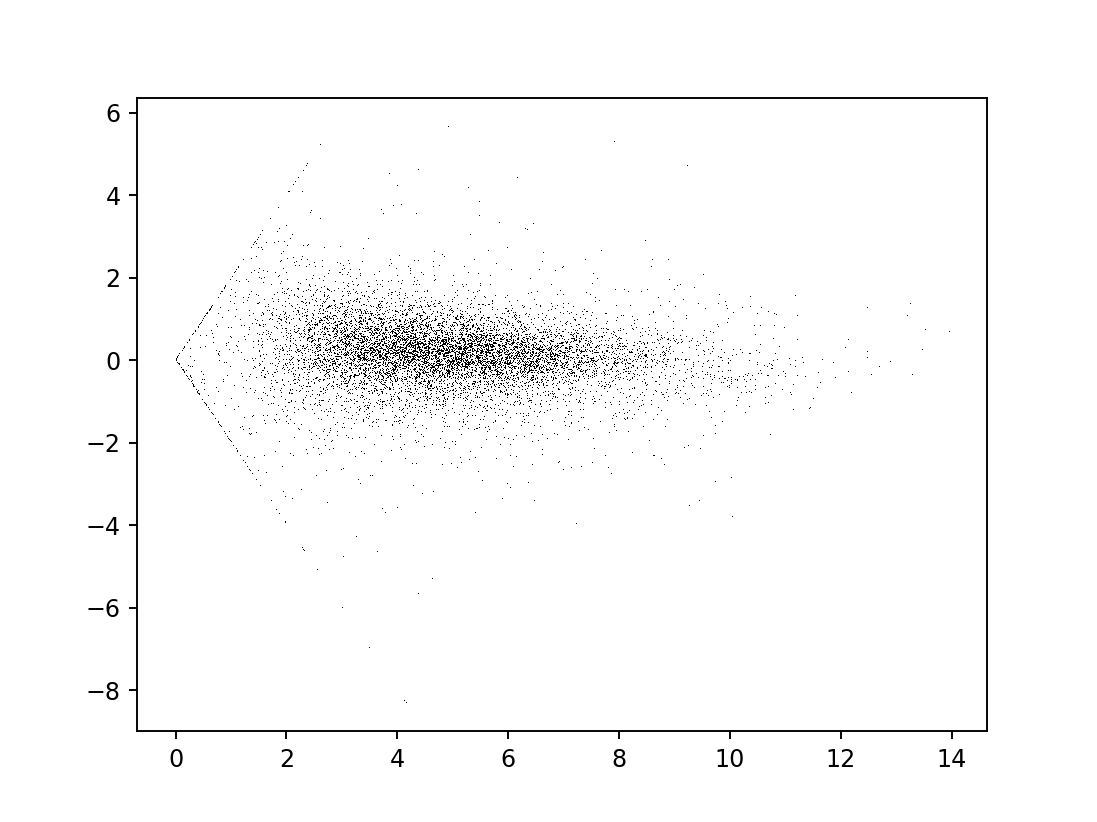

In [35]:
fig = plt.figure()
plt.plot(a,m,"k,")

In [36]:
AM = np.vstack((a,m))
AM.shape

(2, 9759)

<IPython.core.display.Javascript object>


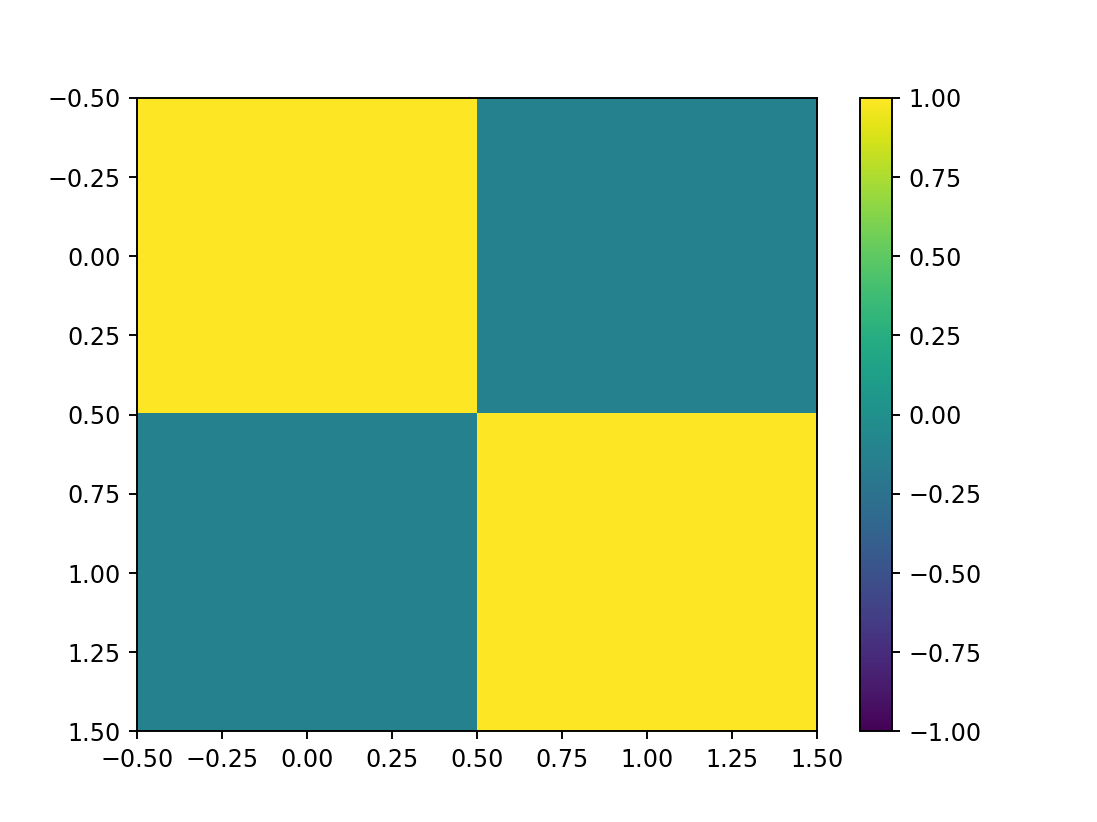

In [37]:
C = correlation_matrix(AM.T)
fig = plt.figure()
plt.imshow(C, aspect = "auto", vmin = -1, vmax = 1)
plt.colorbar()

In [38]:
(eigenvalues, eigenvectors) = np.linalg.eigh(correlation_matrix(P.T))
print(eigenvectors)
print(eigenvalues)

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
[ 0.08609522  1.91390478]


In [39]:
np.sqrt(1./2)

0.70710678118654757

In [40]:
P2 = np.dot(eigenvectors,P)

In [41]:
P2.shape

(2, 9759)

<IPython.core.display.Javascript object>


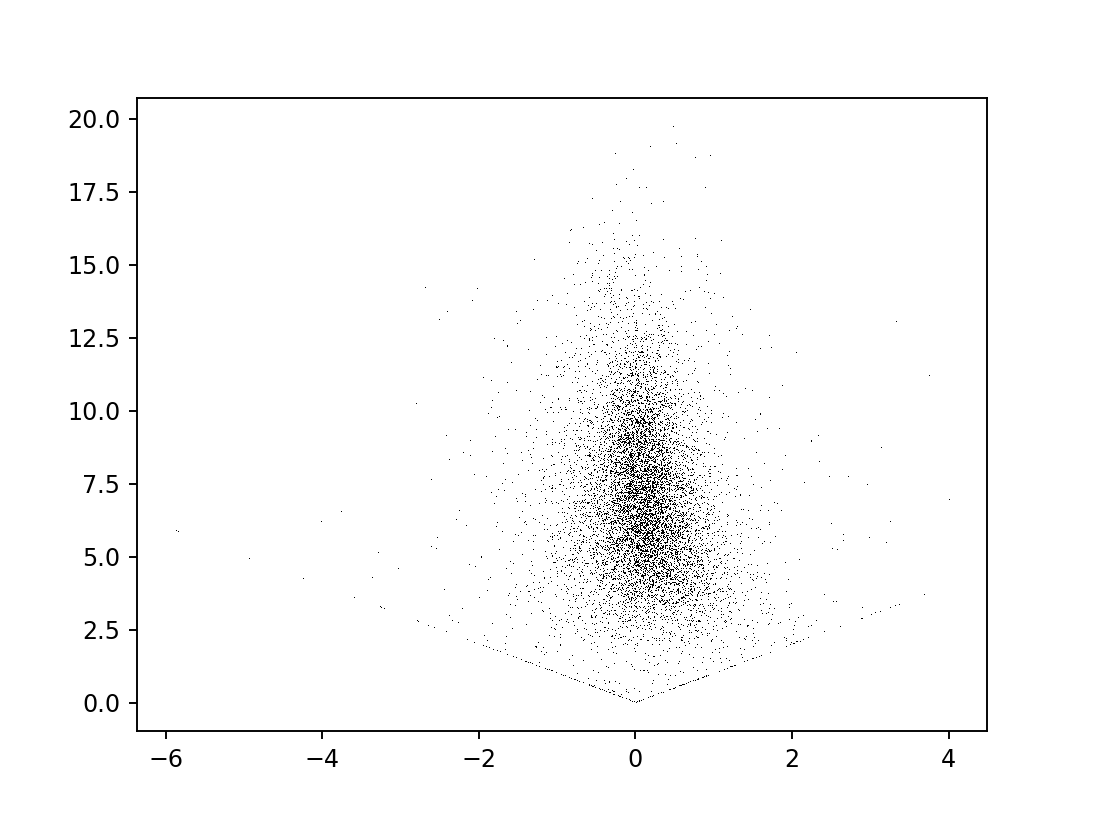

In [42]:
fig = plt.figure()
plt.plot(P2[0],P2[1],"k,")

<IPython.core.display.Javascript object>


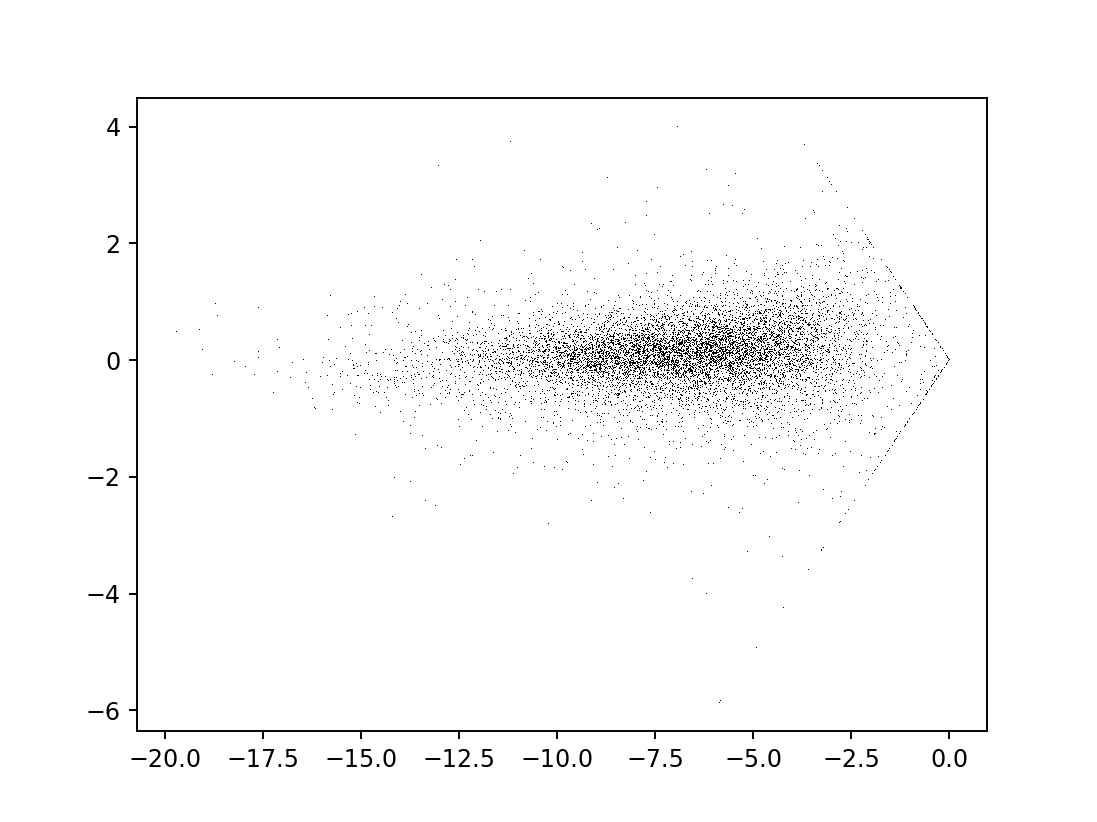

In [43]:
fig = plt.figure()
plt.plot(-P2[1],P2[0],"k,")

In [44]:
u,s,v = np.linalg.svd(col_center(P.T).T, full_matrices=False)
print(u)
print(s)

[[-0.72582607 -0.68787827]
 [-0.68787827  0.72582607]]
[ 278.77358092   59.0485088 ]


In [45]:
v = s**2
v/sum(v)

array([ 0.95706078,  0.04293922])

In [46]:
eigenvalues/sum(eigenvalues)

array([ 0.04304761,  0.95695239])

In [47]:
A = col_center(D.T)

In [48]:
u,s,v = np.linalg.svd(A.T, full_matrices = False)

In [49]:
u.shape

(9939, 36)

<IPython.core.display.Javascript object>


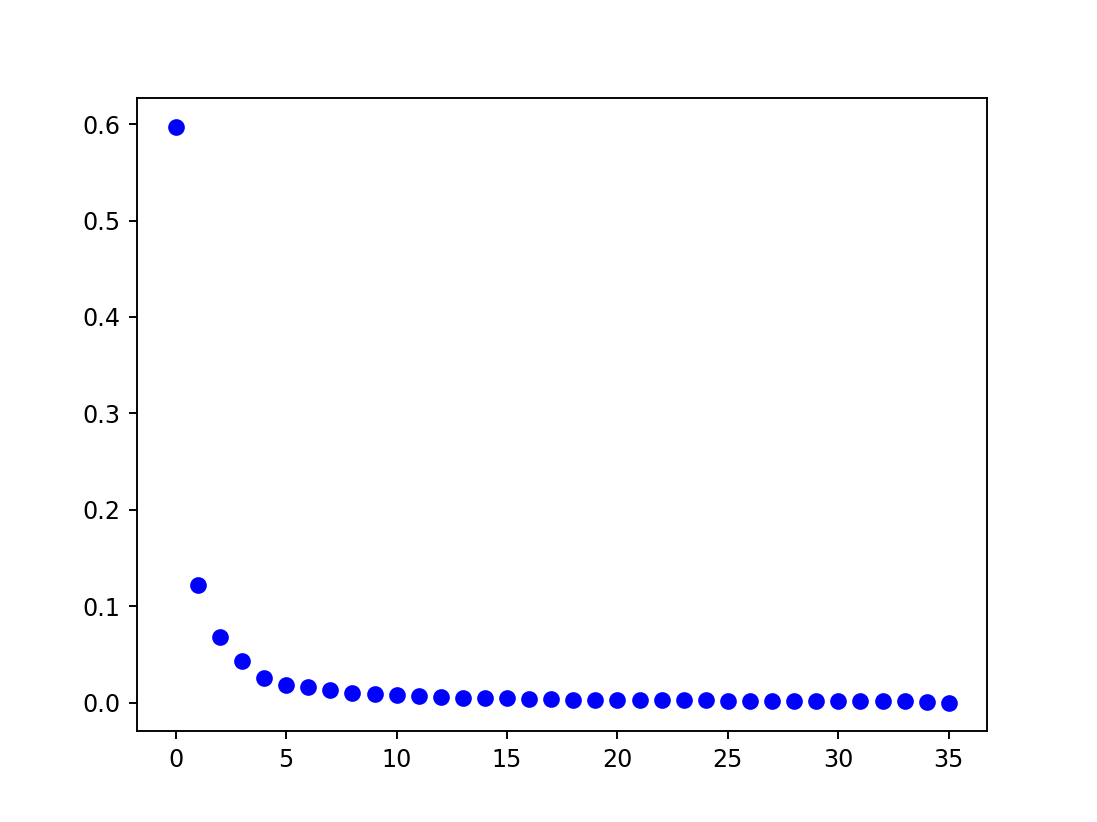

In [50]:
v = s**2
fig = plt.figure()
plt.plot(v/sum(v),"bo")

In [51]:
projected = np.dot(A,u)
projected.shape

(36, 36)

<IPython.core.display.Javascript object>


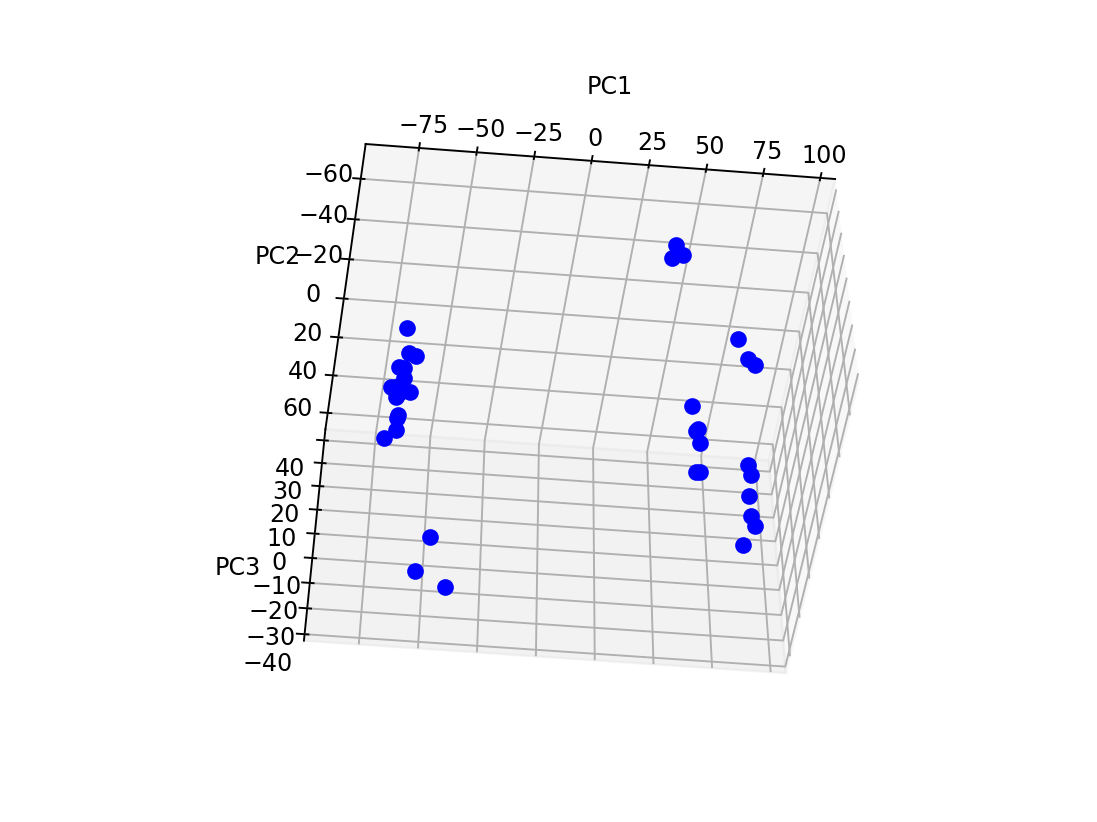

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot(projected[:,0],projected[:,1],projected[:,2],"bo")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

In [56]:
d={"a":3,5:"b","hello":[1,2,3]}

In [57]:
d["hello"]

[1, 2, 3]

In [58]:
d["hello"] = 5

In [59]:
d["hello"]

5

In [60]:
d[3]=7

In [61]:
colors = {"BMDM":{"Live":"#ff0000", # red
                  "Dead":"#00ff00", # green
                  "uninfected":"#0000ff"}, # blue
        "J774":{"Live":"#ffaaaa",
                  "Dead":"#aaffaa",
                  "uninfected":"#aaaaff"}}
markers = {"4h":"^","24h":"o"}

In [62]:
colors = {"BMDM":{"Live":"red",
                  "Dead":"green", 
                  "uninfected":"blue"}, 
        "J774":{"Live":"magenta",
                  "Dead":"orange",
                  "uninfected":"cyan"}}
markers = {"4h":"^","24h":"o"}

In [64]:
list(enumerate(header))

[(0, 'BMDM_Live_1_4h'),
 (1, 'BMDM_Live_1_24h'),
 (2, 'BMDM_Live_2_4h'),
 (3, 'BMDM_Live_2_24h'),
 (4, 'BMDM_Live_3_4h'),
 (5, 'BMDM_Live_3_24h'),
 (6, 'BMDM_Dead_1_4h'),
 (7, 'BMDM_Dead_1_24h'),
 (8, 'BMDM_Dead_2_4h'),
 (9, 'BMDM_Dead_2_24h'),
 (10, 'BMDM_Dead_3_4h'),
 (11, 'BMDM_Dead_3_24h'),
 (12, 'BMDM_uninfected_1_4h'),
 (13, 'BMDM_uninfected_1_24h'),
 (14, 'BMDM_uninfected_2_4h'),
 (15, 'BMDM_uninfected_2_24h'),
 (16, 'BMDM_uninfected_3_4h'),
 (17, 'BMDM_uninfected_3_24h'),
 (18, 'J774_Live_1_4h'),
 (19, 'J774_Live_1_24h'),
 (20, 'J774_Live_2_4h'),
 (21, 'J774_Live_2_24h'),
 (22, 'J774_Live_3_4h'),
 (23, 'J774_Live_3_24h'),
 (24, 'J774_Dead_1_4h'),
 (25, 'J774_Dead_1_24h'),
 (26, 'J774_Dead_2_4h'),
 (27, 'J774_Dead_2_24h'),
 (28, 'J774_Dead_3_4h'),
 (29, 'J774_Dead_3_24h'),
 (30, 'J774_uninfected_1_4h'),
 (31, 'J774_uninfected_1_24h'),
 (32, 'J774_uninfected_2_4h'),
 (33, 'J774_uninfected_2_24h'),
 (34, 'J774_uninfected_3_4h'),
 (35, 'J774_uninfected_3_24h')]

<IPython.core.display.Javascript object>


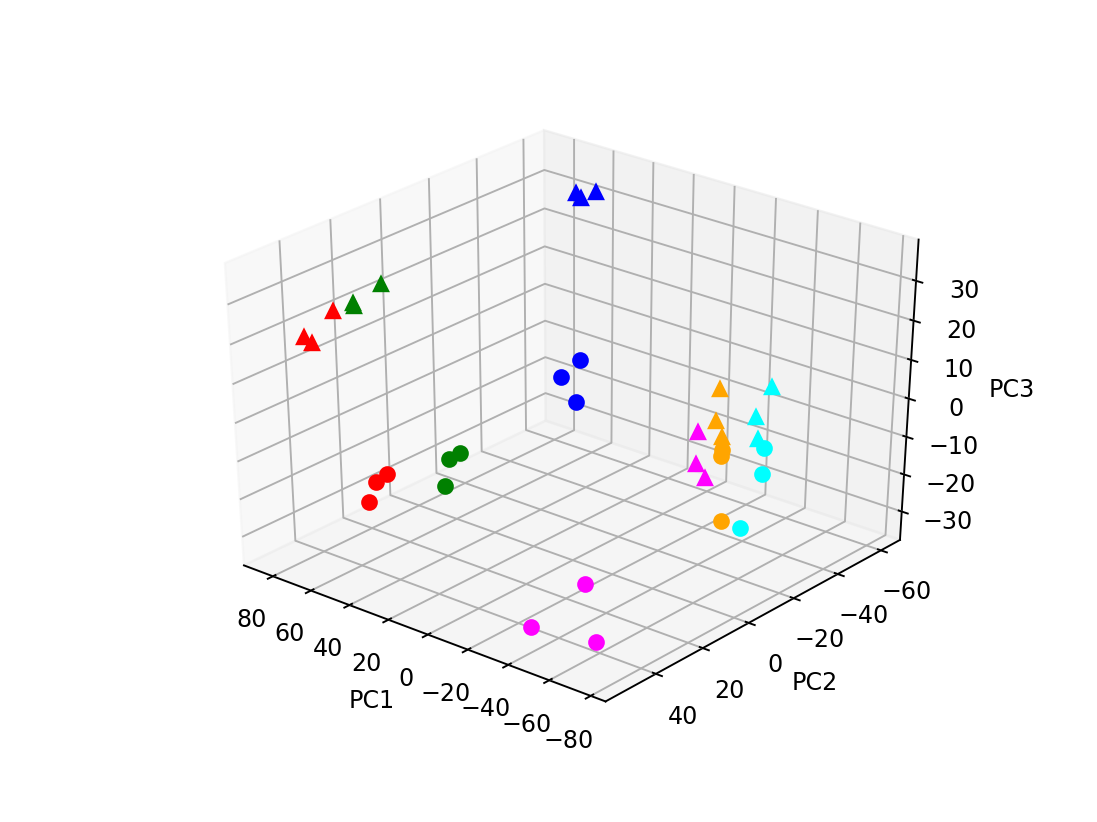

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot(projected[:,0],projected[:,1],projected[:,2],"k,")
for (n,name) in enumerate(header):
    (strain,infection,rep,time) = name.split("_")
    marker = markers[time]
    color = colors[strain][infection]
    ax.plot([projected[n,0]],[projected[n,1]],[projected[n,2]],
           marker = marker, color = color, linestyle = "none")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")